# Decision Tree

- flow diagram
- root, split node and leaf node
- white box algorithm (easy to interpret)
- Sometimes called CARD (Classification and Regression Tree)


### What is a DT?
- Supervised Learning
- Works for both classification and regression
- Foundation on Random Forests
- Attractive because of interpretability

---

#### DT works by:
- Split based on set impurity criteria
- Stopping criteria
    - levels of depth
    
---

Source: Scikit-learn

Some **Advantages** of DT are:

- Simple to understand and to interpret. Trees can be vizualized
- Requires little data preparation
- Able to handle both numerical and categorical data
- Possible to validate a model using statistical tests
- Performs well even if its assumptions are somewhat violated by the true model from which the data were generated

**Disadavantages**:

- Overfitting: Mechanisms such as **pruning** (not currently supported), setting the **minimum number of samples required** at a leaf node or setting the **max. depth of the tree** are necessary to avoid this problem
- Decision trees can be unstable. Mitigant: **Use DT within an ensemble**
- Cannot guarantee to return globally optimal DT. Training multiple trees in an ensemble learner
- DT learners create biased tress if some classes dominate. Recomendation: **Balance the dataset prior to fitting.**
    - **Bagging**
    - **Boosting**

---


## Classification

### Training a DT with Scikit-Learn

In [1]:
from sklearn import tree

In [11]:
X = [[0,0], [1,2]] 
y = [0,1] # binary class

In [12]:
clf = tree.DecisionTreeClassifier()

In [13]:
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [6]:
# unseen data
clf.predict([[2., 2.]])

array([1])

In [14]:
# 0 prob in 1st class
# 1 prob in 2nd class
clf.predict_proba([[2. , 2.]])

array([[0., 1.]])

In [15]:
clf.predict([[0.4, 1.2]])

array([0])

In [16]:
clf.predict_proba([[0.4, 1.2]])

array([[1., 0.]])

In [17]:
clf.predict_proba([[0, 0.2]])

array([[1., 0.]])

`DecisionTreeClassifier` is capable of both binary (where the labels are [-1, 1]) classification and multiclass (where the labels are [0, …, K-1]) classification.

---

## Decision Tree on Iris Dataset

In [18]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()

In [19]:
iris.data[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [20]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [21]:
X = iris.data[:, 2:]

In [22]:
y = iris.target

In [23]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [24]:
clf = tree.DecisionTreeClassifier(random_state=42)

In [25]:
clf = clf.fit(X, y)

#### Export_graphviz

In [26]:
from sklearn.tree import export_graphviz

In [27]:
export_graphviz(clf,
                out_file="tree.dot",
                feature_names=iris.feature_names[2:],
                class_names=iris.target_names,
                rounded=True,
                filled=True)

Run the following line on your command prompt


`$ dot -Tpng tree.dot -o tree.png`

<img src="tree.png" width=60% height=60%>

#### Graphviz

In [29]:
import graphviz

In [30]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=iris.feature_names[2:],
                                class_names=iris.target_names,
                                rounded=True,
                                filled=True)

In [31]:
graph = graphviz.Source(dot_data)

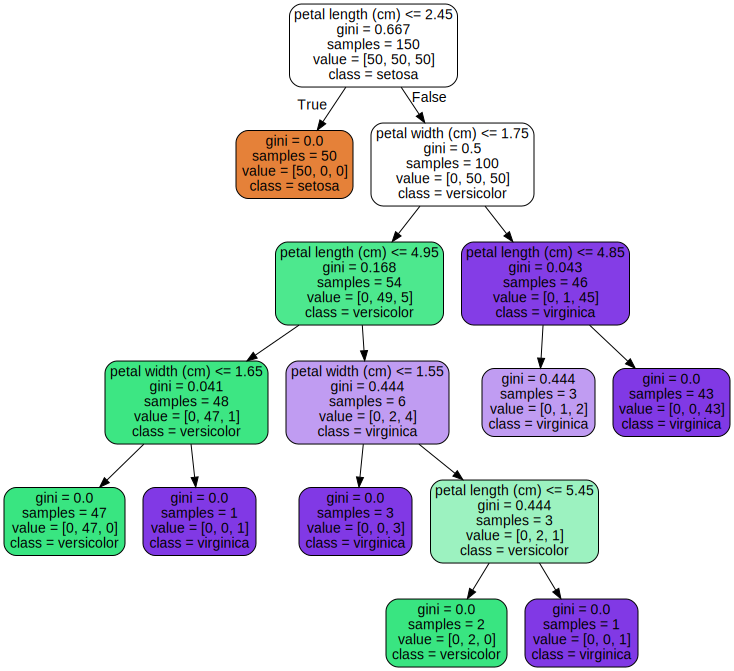

In [32]:
graph

### Visualise the Decision Boundary

In [33]:
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [35]:
col = ['petal_length', 'petal_width']
X = df.loc[:, col]

In [36]:
species_to_num = {'setosa': 0,
                  'versicolor': 1,
                  'virginica': 2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']

In [37]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

In [38]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

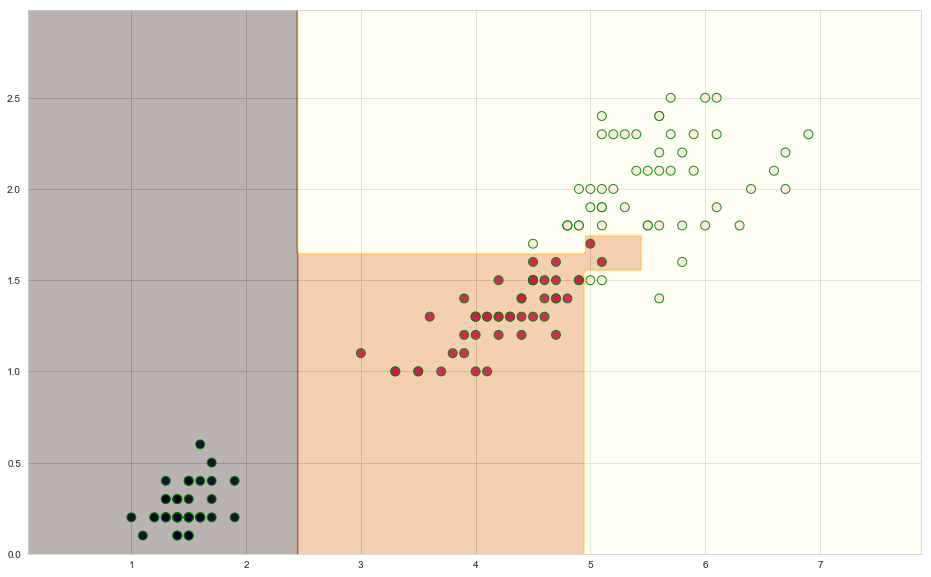

In [39]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(16,10))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3);
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80, 
            alpha=0.9, edgecolors='g');

***

# Decision Tree Learning

* [ID3](https://en.wikipedia.org/wiki/ID3_algorithm) (Iterative Dichotomiser 3)
* [C4.5](https://en.wikipedia.org/wiki/C4.5_algorithm) (successor of ID3)
* CART (Classification And Regression Tree)
* [CHAID](http://www.statisticssolutions.com/non-parametric-analysis-chaid/) (Chi-squared Automatic Interaction Detector). by [Gordon Kass](https://en.wikipedia.org/wiki/Chi-square_automatic_interaction_detection). 

### Tree Algorithms: ID3, C4.5, C5.0 and CART

* ID3 (Iterative Dichtomiser 3) was developed in 1986 by Ross Quinlan. The algotithm creates a multiway tree, finding for each node (in a greedy manner) the categorical feature that will yield the **largest information gain** for categorical targets. Trees are grown to their maximum size and then a **prunning step** is usually applied to improve the ability of the tree to generalize the unseen data. 

* **C4.5** is a successor of ID3 and removed the restriction that features must be categorical by dynamically defining a discrete attribute (based on numerical values) that partitions the continnuous attribute value into a discrete set of intervals. C4.5 converts thr trained trees (output of ID3) into **sets of if-then rules**. These accuracy of each rule is then evaluated to determine the order in which they should be applied. **Prunning** is done by removing a rule's precondition if the accuracy of the rule improves withouth it.

* **C5.0** is Quinlan's last version release under a proprietary license. It uses less memory and  builds smaller rulesets than C5.5 while being more accurate

* **CHART** (Classifcication and Regression Trees) is very similar to C4.5, but differs in that it supports numerical target attributes (Regression) and does not cimpute rule sets. CART constructs **binary trees** using the feature and **treshold** that yield the largest information gain at each node. 

* **CHAID** (Chi-squared Automatic Interaction Detector) by Gordon Kass. Performs multi-level splits computing classification tress. Non-parametric. Does not require the data to be normally distributed. 

scikit-learn uses an optimised version of the CART algorithm.

#### Giny Impuriy

scikit-learn default
https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity

A measure of purity / variability of categorical data

As a side note on the difference between **Gini Impurity** and **Gini Coefficient**
https://datascience.stackexchange.com/questions/1095/gini-coefficient-vs-gini-impurity-decision-trees

* No, despite their names they are not equivalent or even that similar.
* **Gini impurity** is a measure of misclassification, which applies in a multiclass classifier context.
* **Gini coefficient** applies to binary classification and requires a classifier that can in some way rank examples according to the likelihood of being in a positive class.
* Both could be applied in some cases, but they are different measures for different things. Impurity is what is commonly used in decision trees.

Developed by [Corrado Gini](https://en.wikipedia.org/wiki/Corrado_Gini) in 1912

Key Points:
* A pure node (homogeneous contents or samples with the same class) will have a Gini coefficient of zero
* As the variation increases (heterogeneous classes or increase diversity), Gini coefficient increases and approaches 1.

$$Gini=1-\sum^r_j p^2_j$$

$p$ is the probability (often based on the frequency table)

# Entropy

https://en.wikipedia.org/wiki/Entropy_information_theory

The entropy can explicitly be written as

$${\displaystyle \mathrm {H} (X)=\sum _{i=1}^{n}{\mathrm {P} (x_{i})\,\mathrm {I} (x_{i})}=-\sum _{i=1}^{n}{\mathrm {P} (x_{i})\log _{b}\mathrm {P} (x_{i})},}$$

where `b` is the base of the logarithm used. Common values of `b` are 2, Euler's number `e`, and 10




# Which should I use?

[Sebastian Raschka](https://sebastianraschka.com/faq/docs/decision-tree-binary.html)

* They tend to generate similar tree
* Gini tends to be faster to compute

In [44]:
def gini(p):
    return (p)*(1 - (p)) + (1 - p)*(1 - (1-p))

def entropy(p):
    return - p*np.log2(p) - (1 - p)*np.log2((1 - p))

def error(p):
    return 1 - np.max([p, 1 - p])

In [45]:
x = np.arange(0.0, 1.0, 0.01)

# calc entropy
ent = [entropy(p) if p != 0 else None for p in x]

sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]

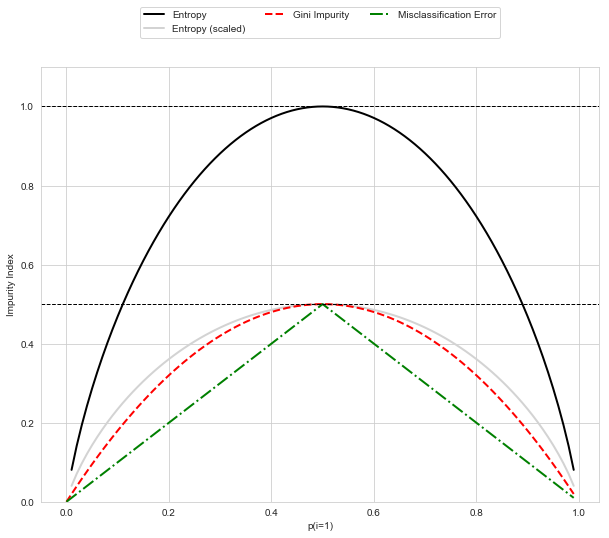

In [46]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], 
                   ['Entropy', 'Entropy (scaled)', 
                   'Gini Impurity', 
                   'Misclassification Error'],
                   ['-', '-', '--', '-.'],
                   ['black', 'lightgray',
                      'red', 'green', 'cyan']):
     line = ax.plot(x, i, label=lab, 
                    linestyle=ls, lw=2, color=c)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
           ncol=3, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

# Information Gain

* Expected reduction in entropy caused by splitting 

* Keep splitting until you obtain a as close to homogeneous class as possible



## Regression

In [47]:
from sklearn import tree

In [48]:
X = [[0, 0], [3,3]]
y = [0.75, 3]

In [49]:
tree_reg = tree.DecisionTreeRegressor(random_state=42)

In [50]:
tree_reg = tree_reg.fit(X, y)

In [51]:
tree_reg.predict([[1.5, 1.5]])

array([0.75])

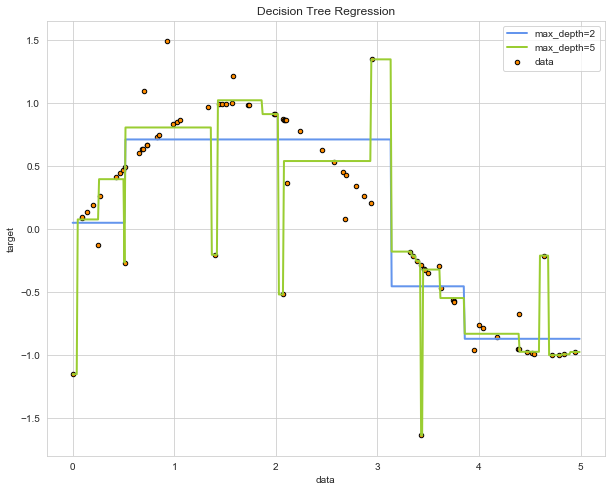

In [52]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)


# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure(figsize=(10,8))
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()

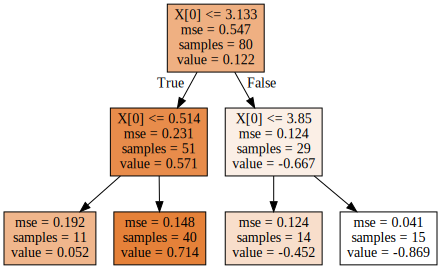

In [53]:
dot_data = tree.export_graphviz(regr_1, out_file=None,
                                filled=True)
graph = graphviz.Source(dot_data)
graph

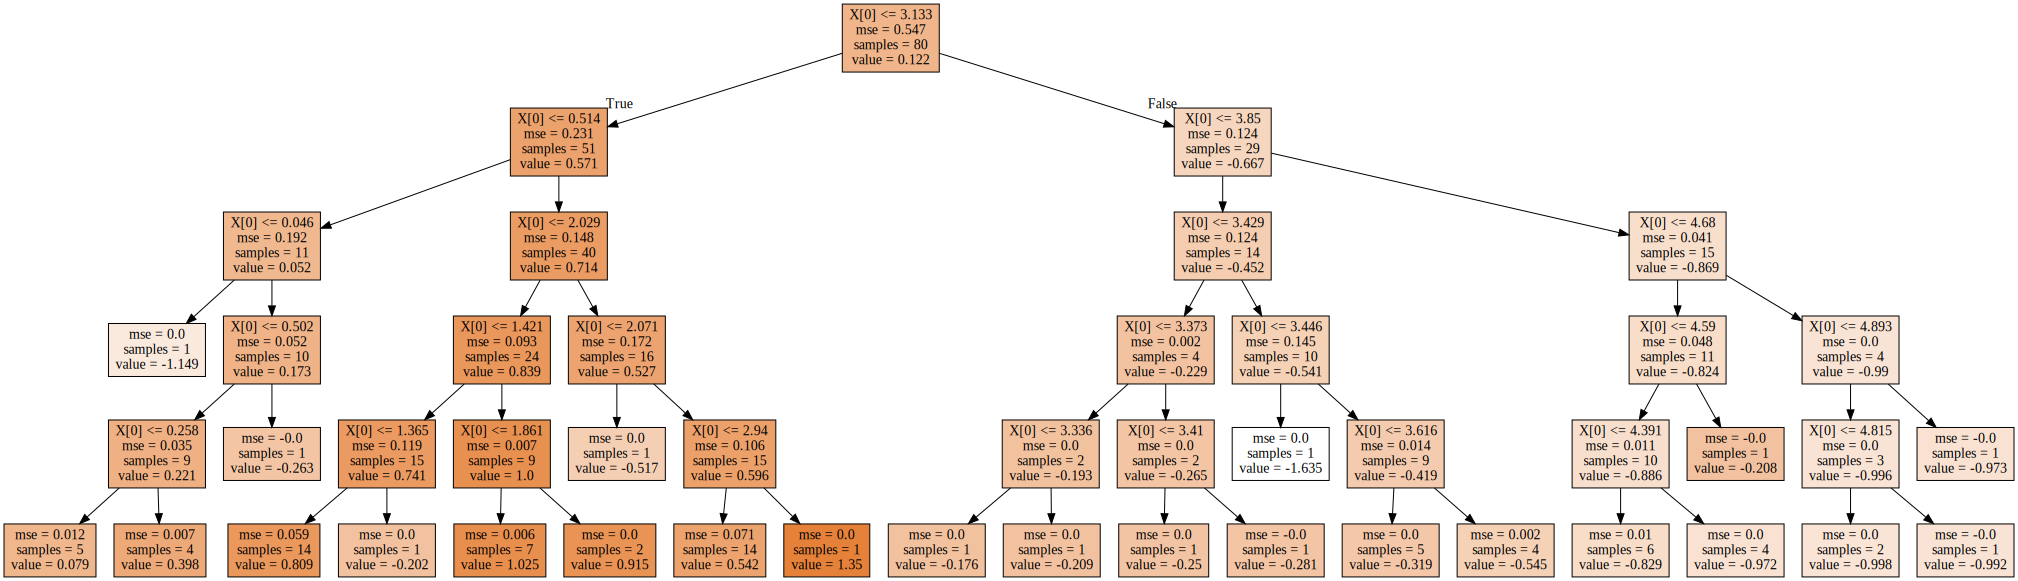

In [54]:
dot_data = tree.export_graphviz(regr_2, out_file=None,
                                filled=True)
graph = graphviz.Source(dot_data)
graph

### Regularization

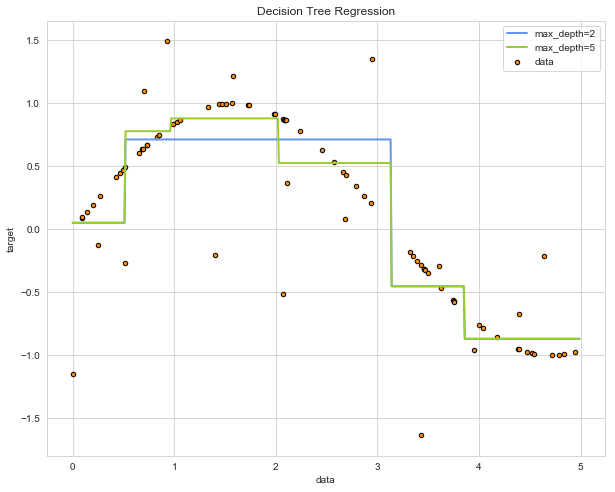

In [55]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5, min_samples_leaf=10)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure(figsize=(10,8))
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

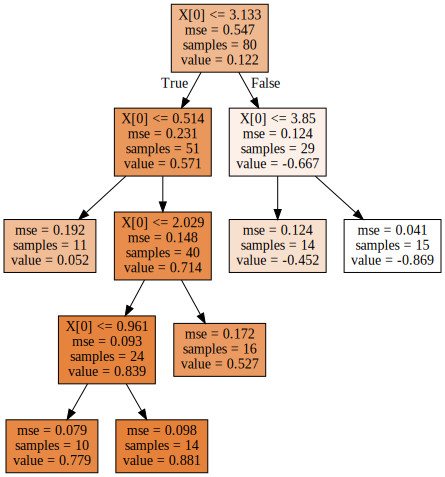

In [56]:
dot_data = tree.export_graphviz(regr_2, out_file=None,
                                filled=True)
graph = graphviz.Source(dot_data)
graph

### Overfitting

In [57]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()

In [58]:
X = iris.data[:, 0:2]
y = iris.target
clf = tree.DecisionTreeClassifier(random_state=42)
clf = clf.fit(X, y)

In [59]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=iris.feature_names[2:],
                                class_names=iris.target_names,
                                rounded=True,
                                filled=True)

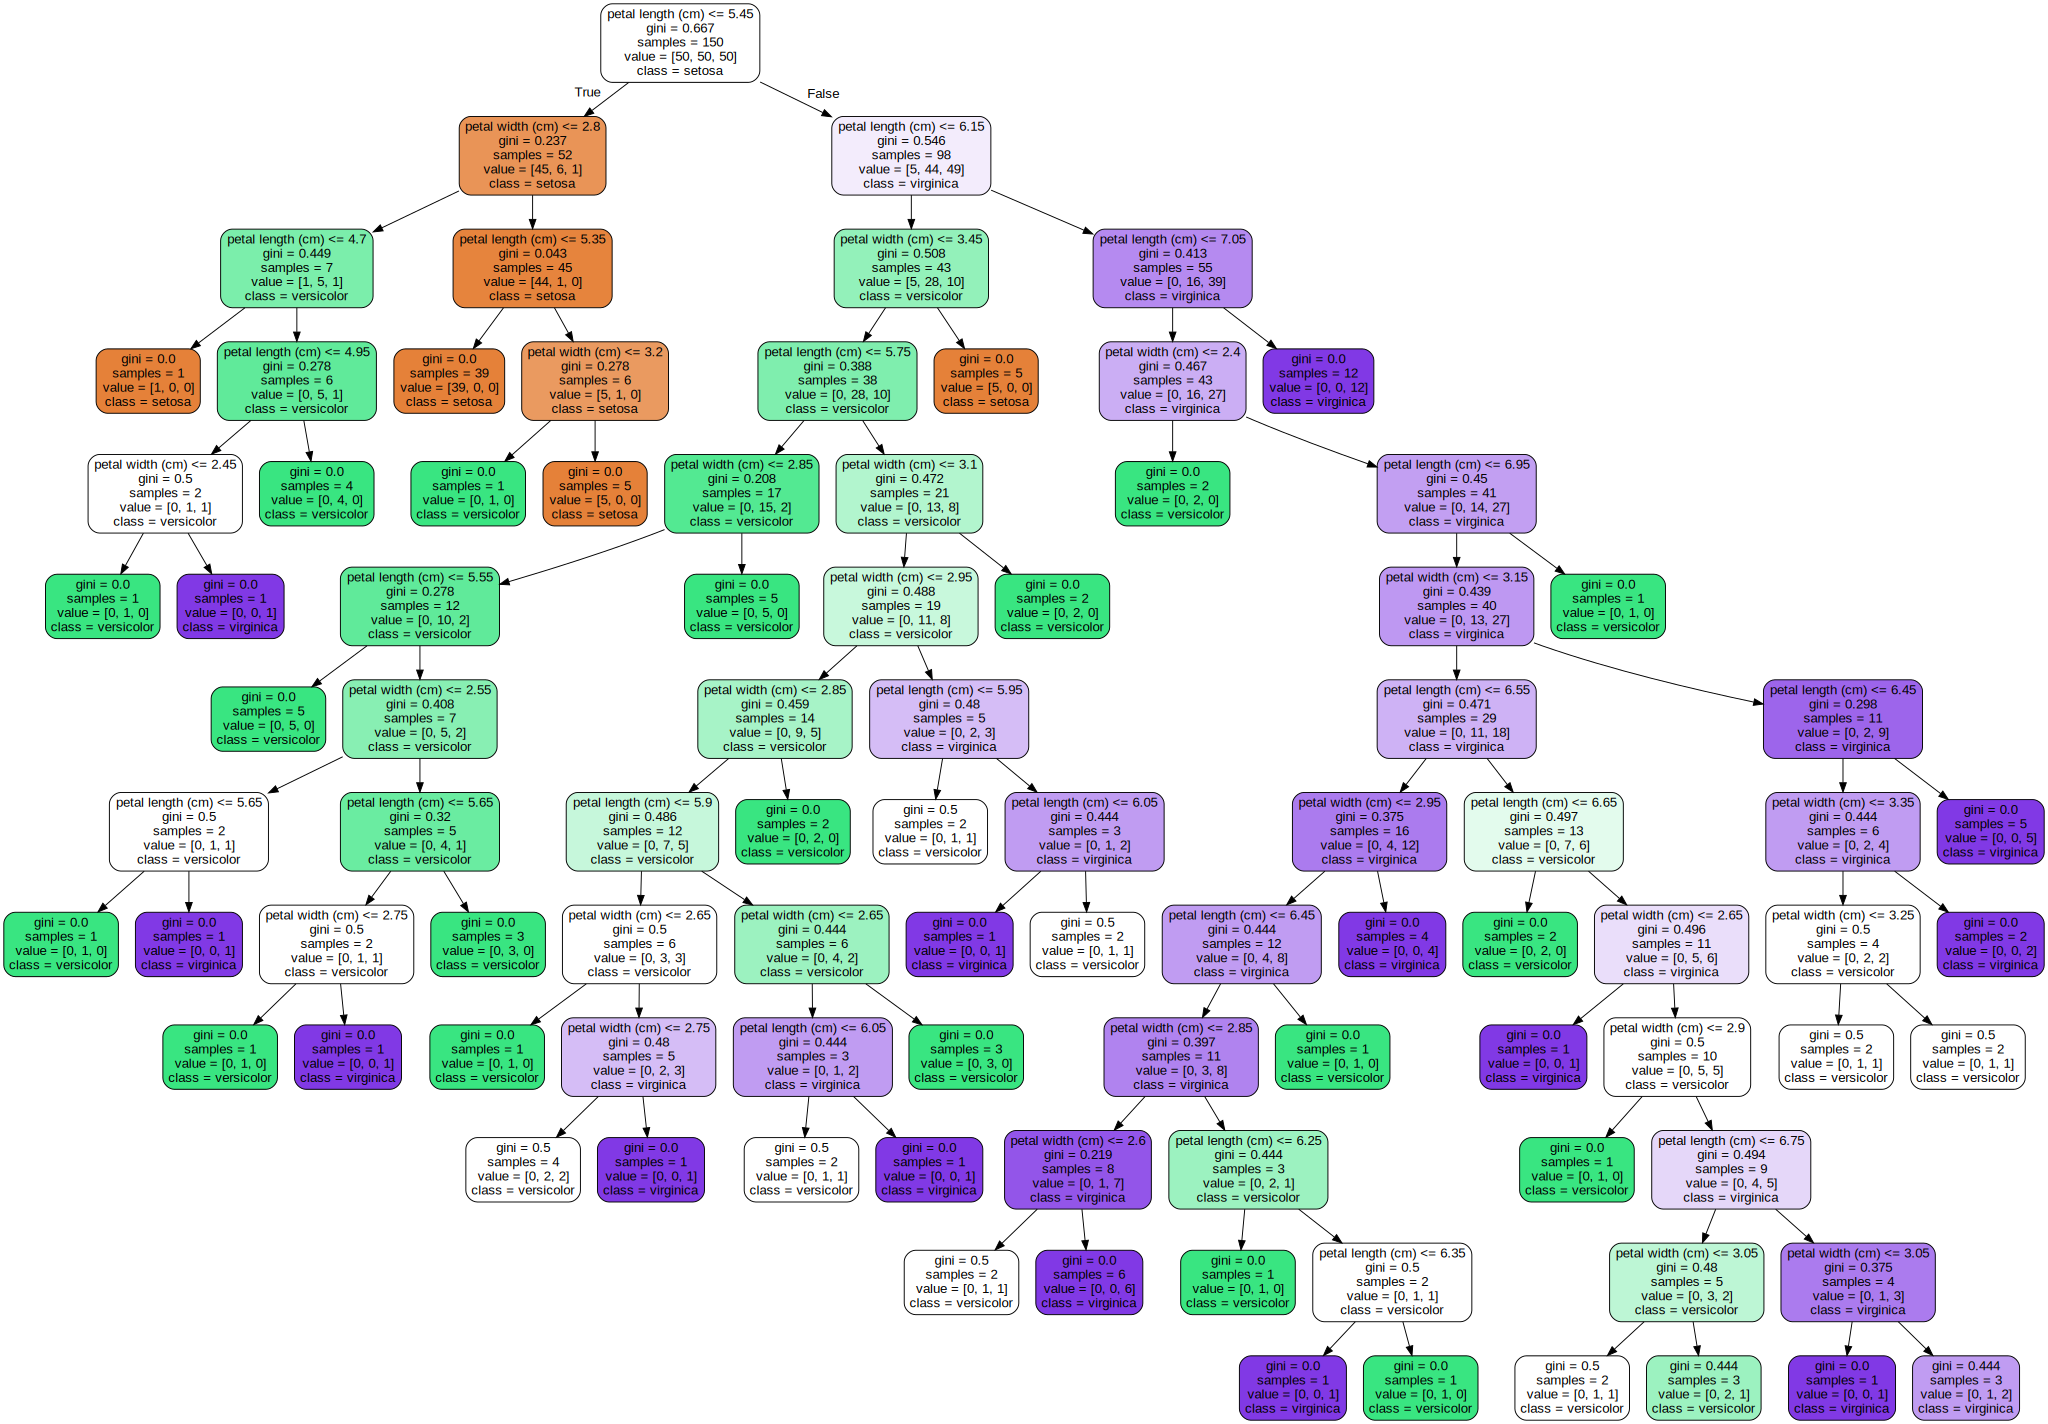

In [60]:
graph = graphviz.Source(dot_data)
graph

## Modelling End-to-End with Decision Tree

In [63]:
# dataset within scikitlearn
# generate rand dots (hard to handle)
# prob will overfit
from sklearn.datasets import make_moons

In [64]:
X_data, y_data = make_moons(n_samples=1000, noise=0.5, random_state=42)

In [65]:
make_moons?

In [66]:
cl1 = tree.DecisionTreeClassifier(random_state=42)
cl2 = tree.DecisionTreeClassifier(min_samples_leaf=10, random_state=42)

In [67]:
from sklearn.model_selection import train_test_split

In [71]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.1, random_state=42)

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
# trial and error to find best hyperparm values

#params = {'max_leaf_nodes': list(range(2, 50)),
#          'min_samples_split': [2, 3, 4],
#          'min_samples_leaf': list(range(5, 20))}

params ={'min_samples_leaf': list(range(5, 20))}

In [72]:
grid_search_cv = GridSearchCV(tree.DecisionTreeClassifier(random_state=42), params, n_jobs=-1, verbose=1)

grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


/home/tiago/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    2.4s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'min_samples_leaf': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [73]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=19, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [74]:
from sklearn.metrics import accuracy_score

In [75]:
y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.83

---

In [76]:
cl1.fit(X_train, y_train)
y_pred = cl1.predict(X_test)
accuracy_score(y_test, y_pred)

0.74

In [78]:
cl2.fit(X_train, y_train)
y_pred = cl2.predict(X_test)
accuracy_score(y_test, y_pred)

0.84

In [80]:
# didnt tweaked all the paramaters availalble in classifier

cl1.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 42,
 'splitter': 'best'}

### Next Steps

#### DT Usage
* Decision tree tend to overfit data with large number of features. Check ratio of samples to number of features
* Consider performing dimensionality reduction (PCA, ICA, Feature Selection) beforehand
* Visualize your tree as you are training by using the export function. Use **max_depth=3** as an initial tree depth.
* Use **max_depth** to control the size of the tree to prevent overfiting
* Tune **min_samples_split** or **min_samples_leaf** to control the number of samples at each leaf node
* Balance your dataset before training to prevent the tree from being biased toward the classes that are dominant
    * By sampling an equal number of samples from each class
    * By normalizing the sum of the sample weights (sample_weight) for each class to the same value
    
    

# References:
1. [Wikipedia - Decision Tree Learning](https://en.wikipedia.org/wiki/Decision_tree_learning)
2. [Decision Tree - Classification](http://www.saedsayad.com/decision_tree.htm)
3. [Data Aspirant](http://dataaspirant.com/2017/01/30/how-decision-tree-algorithm-works/)
4. [Scikit-learn](http://scikit-learn.org/stable/modules/tree.html)
5. https://en.wikipedia.org/wiki/Predictive_analytics
6. L. Breiman, J. Friedman, R. Olshen, and C. Stone. Classification and Regression Trees. Wadsworth, Belmont, CA, 1984.
7. J.R. Quinlan. C4. 5: programs for machine learning. Morgan Kaufmann, 1993.
8. T. Hastie, R. Tibshirani and J. Friedman. Elements of Statistical Learning, Springer, 2009.
